<a href="https://colab.research.google.com/github/Ad603-tech/Assignment-submission/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

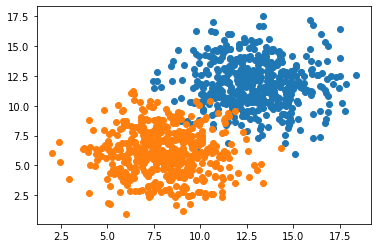

In [8]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [11]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true')

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 2ms/step - loss: 0.9500 - accuracy: 0.5930
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.6910
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7710
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8670
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8840
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.9030
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9480
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9500
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9510
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9590
Epoch 11/500
20/20 [=

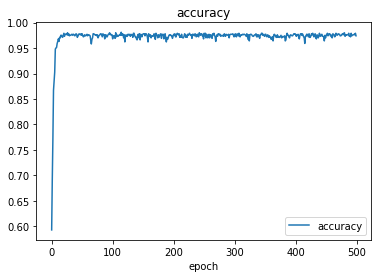

In [13]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

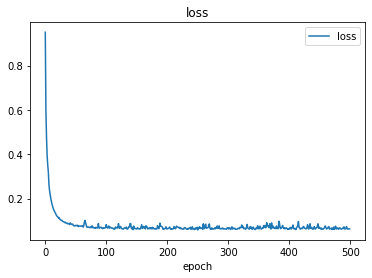

In [14]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [23]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

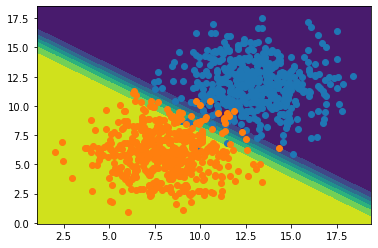

In [25]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.99998224]]


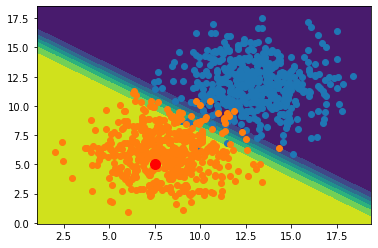

In [27]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize=10, color="red")
print("Prediction is:", prediction)